<a href="https://colab.research.google.com/github/Christell3/CMPT308N_ContactManagementSystem_TeamPurple/blob/main/WineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np
import geopandas as gpd

In [13]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving wine_food_pairings.csv to wine_food_pairings (1).csv


Saving winequality-white.csv to winequality-white.csv


Saving winequality-red.csv to winequality-red.csv


In [19]:
redWine = pd.read_csv("winequality-red.csv", sep=';')
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
whiteWine =pd.read_csv("winequality-white.csv", sep=';')
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
pairing =pd.read_csv("wine_food_pairings.csv")
pairing.head()


,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
0,Syrah/Shiraz,Red,smoked sausage,Smoky BBQ,Spanish,2,Poor,Heuristic pairing assessment.
1,Grenache,Red,charcuterie board,Salty Snack,French,3,Neutral,Heuristic pairing assessment.
2,Madeira,Fortified,lemon tart,Dessert,French,4,Good,Acidic wine balances acidic food.
3,Cabernet Sauvignon,Red,roast lamb,Red Meat,Mexican,5,Excellent,Tannic red complements red meat fat.
4,Viognier,White,duck à l’orange,Poultry,Vietnamese,2,Poor,Heuristic pairing assessment.


In [37]:
#dataset
df = pd.DataFrame(redWine)
#creating pie chart
fig = px.pie(df, values='quality', names='quality', title='Quality Pie Chart')
#showing pie chart
fig.show()

In [41]:
df = pd.DataFrame(redWine)
df['fixed acidity_rounded'] = df['fixed acidity'].round().astype(int)
fig = px.pie(df, values='fixed acidity_rounded', names='fixed acidity_rounded', title='Acidity Pie Chart')
fig.show()
#realized this wasnt eally helpful in a pie chart, needed to be a bar chart to properly viausalize the makeup of fixed acidity values

In [ ]:
#bar chart w

In [22]:
# Filter for red wines
red_wines_df = all_wines[all_wines['type'] == 'red']

# Group by pH and calculate the mean quality for red wines
average_quality_by_ph_red = red_wines_df.groupby('pH')['quality'].mean().reset_index()

# Create the bar chart for red wines
fig_red = px.bar(
    average_quality_by_ph_red,
    x='pH',
    y='quality',
    title='Average Red Wine Quality by pH',
    labels={'pH': 'pH Value', 'quality': 'Average Quality'},
    color='quality', # Color bars based on quality
    color_continuous_scale=px.colors.sequential.Reds # Use a red sequential color scale
)

fig_red.update_layout(xaxis_title='pH Value', yaxis_title='Average Quality')
fig_red.show()

### Average White Wine Quality by pH

In [23]:
# Filter for white wines
white_wines_df = all_wines[all_wines['type'] == 'white']

# Group by pH and calculate the mean quality for white wines
average_quality_by_ph_white = white_wines_df.groupby('pH')['quality'].mean().reset_index()

# Create the bar chart for white wines
fig_white = px.bar(
    average_quality_by_ph_white,
    x='pH',
    y='quality',
    title='Average White Wine Quality by pH',
    labels={'pH': 'pH Value', 'quality': 'Average Quality'},
    color='quality', # Color bars based on quality
    color_continuous_scale=px.colors.sequential.Blues # Use a blue sequential color scale
)

fig_white.update_layout(xaxis_title='pH Value', yaxis_title='Average Quality')
fig_white.show()

In [21]:
# Add a 'type' column to distinguish between red and white wines before concatenating
redWine['type'] = 'red'
whiteWine['type'] = 'white'

# Concatenate the two DataFrames
all_wines = pd.concat([redWine, whiteWine], ignore_index=True)

# Group by pH and calculate the mean quality
average_quality_by_ph = all_wines.groupby('pH')['quality'].mean().reset_index()

# Create the bar chart
fig = px.bar(
    average_quality_by_ph,
    x='pH',
    y='quality',
    title='Average Wine Quality by pH Across All Wines',
    labels={'pH': 'pH Value', 'quality': 'Average Quality'},
    color='quality', # Color bars based on quality
    color_continuous_scale=px.colors.sequential.Viridis # Use a sequential color scale
)

fig.update_layout(xaxis_title='pH Value', yaxis_title='Average Quality')
fig.show()

In [20]:
import plotly.express as px

# Calculate correlation for red wine
red_wine_corr = redWine['quality'].corr(redWine['pH'])

# Calculate correlation for white wine
white_wine_corr = whiteWine['quality'].corr(whiteWine['pH'])

# Create a DataFrame for plotting
correlation_df = pd.DataFrame({
    'Wine Type': ['Red Wine', 'White Wine'],
    'Correlation (Quality vs pH)': [red_wine_corr, white_wine_corr]
})

# Create the bar chart using Plotly Express
fig = px.bar(
    correlation_df,
    x='Wine Type',
    y='Correlation (Quality vs pH)',
    title='Correlation between Wine Quality and pH',
    labels={'Correlation (Quality vs pH)': 'Correlation Coefficient'},
    color='Wine Type',
    color_discrete_map={'Red Wine': 'darkred', 'White Wine': 'lightgrey'},
    text_auto=True # Automatically display text labels on bars
)

fig.update_layout(yaxis_range=[-0.5, 0.5]) # Set y-axis range for better comparison

fig.show()
#The bar graph you just saw illustrates the correlation between wine quality and pH for two types of wine: Red Wine and White Wine.For Red Wine, the correlation coefficient was around -0.058. This indicates a very slight negative linear relationship. In simpler terms, as the pH of red wine marginally increases, its quality tends to slightly decrease, but this connection is extremely weak and not very impactful.
#For White Wine, the correlation coefficient was approximately 0.099. This suggests a very slight positive linear relationship. This means that as the pH of white wine marginally increases, its quality tends to slightly increase, but similar to red wine, this relationship is also very weak.
#Since both correlation values are very close to zero, we can conclude that there isn't a strong direct linear link between the pH level and the overall quality rating for either red or white wines in this dataset.

In [24]:
# Filter for white wines
white_wines_df = all_wines[all_wines['type'] == 'white']

# Group by pH and calculate the mean quality for white wines
average_quality_by_ph_white = white_wines_df.groupby('fixed acidity')['quality'].mean().reset_index()

# Create the bar chart for white wines
fig_white = px.bar(
    average_quality_by_ph_white,
    x='fixed acidity',
    y='quality',
    title='Average White Wine Quality by fixed acidity',
    labels={'fixed acility': 'Fixed Acidity Value', 'quality': 'Average Quality'},
    color='quality', # Color bars based on quality
    color_continuous_scale=px.colors.sequential.Blues # Use a blue sequential color scale
)

fig_white.update_layout(xaxis_title='Fixed Acidity Value', yaxis_title='Average Quality')
fig_white.show()

In [25]:
# Filter for red wines
red_wines_df = all_wines[all_wines['type'] == 'red']

# Group by pH and calculate the mean quality for red wines
average_quality_by_ph_red = red_wines_df.groupby('fixed acidity')['quality'].mean().reset_index()

# Create the bar chart for red wines
fig_red = px.bar(
    average_quality_by_ph_red,
    x='fixed acidity',
    y='quality',
    title='Average Red Wine Quality by fixed acidity',
    labels={'fixed acidity': 'fixed acidity Value', 'quality': 'Average Quality'},
    color='quality', # Color bars based on quality
    color_continuous_scale=px.colors.sequential.Reds # Use a red sequential color scale
)

fig_red.update_layout(xaxis_title='fixed acidity', yaxis_title='Average Quality')
fig_red.show()

In [27]:
redWine_numeric = redWine.drop(columns=['type'])
correlation_matrix_red = redWine_numeric.corr()
red_wine_correlations_quality = correlation_matrix_red['quality'].abs().sort_values(ascending=False)
print(red_wine_correlations_quality)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


In [28]:
whiteWine_numeric = whiteWine.drop(columns=['type'])
correlation_matrix_white = whiteWine_numeric.corr()
white_wine_correlations_quality = correlation_matrix_white['quality'].abs().sort_values(ascending=False)
print(white_wine_correlations_quality)

quality                 1.000000
alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64


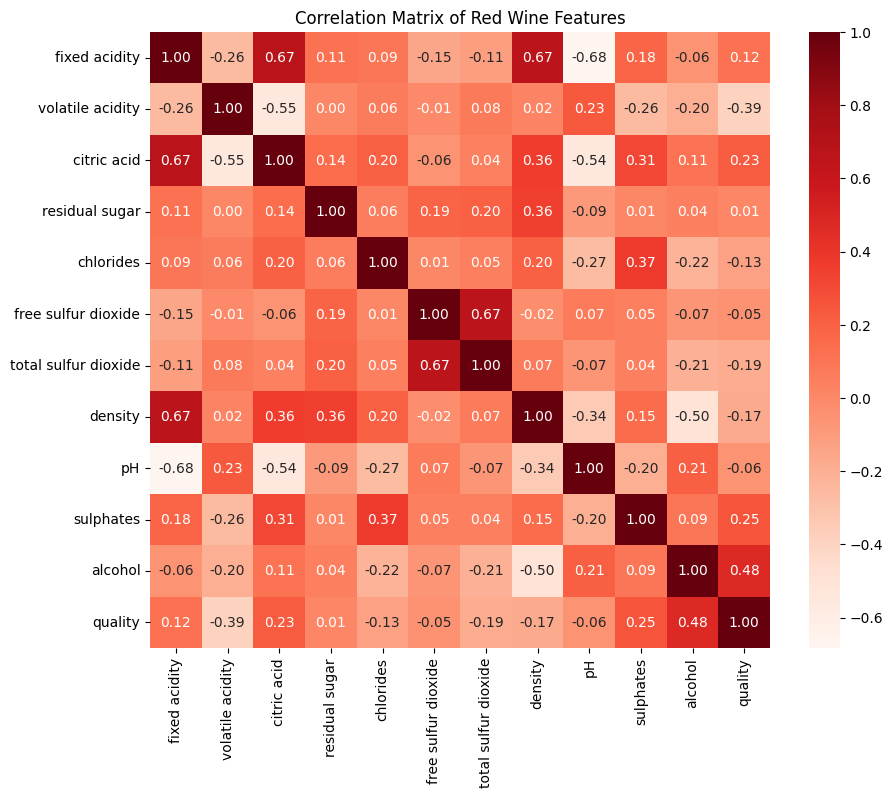

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_red, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix of Red Wine Features')
plt.show()


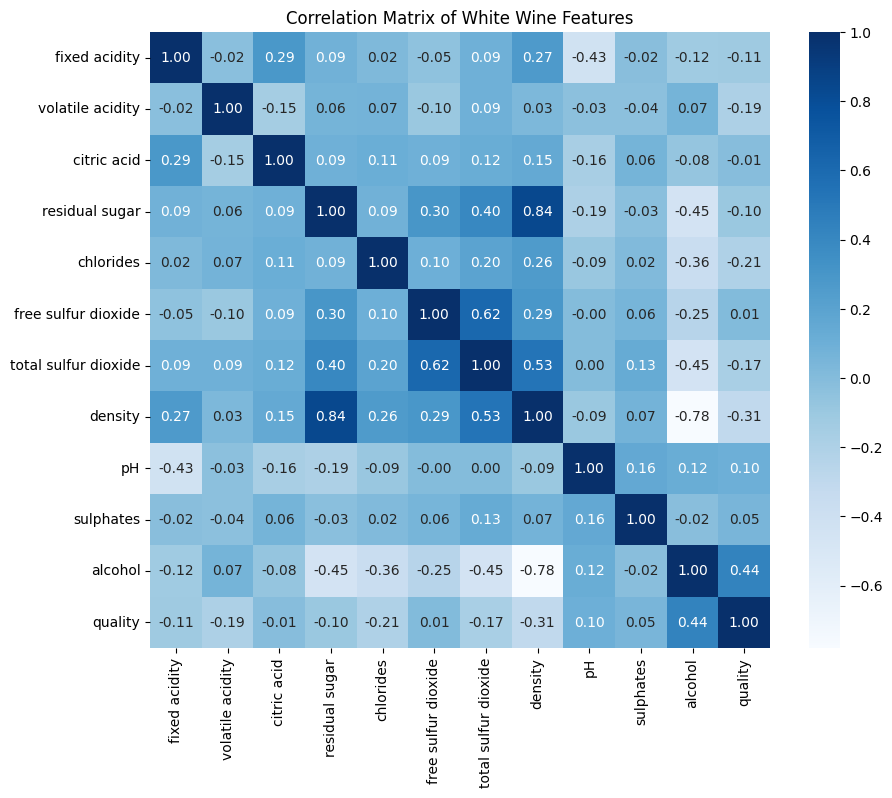

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_white, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix of White Wine Features')
plt.show()